In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [ ]:
df

In [ ]:
df.info()

In [ ]:
# Converting string values into ints

In [ ]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

In [ ]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [ ]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [ ]:
df['weekday'] = df['date'].dt.weekday

In [ ]:
df.meal.unique()

In [ ]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

In [ ]:
# Converting country from str to int using LabelEncoder

df.country = df.country.fillna('O')     # Filling Null values for the LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df.country.unique()

In [ ]:
df.market_segment.unique()

In [ ]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

In [ ]:
df.distribution_channel.unique()

In [ ]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

In [ ]:
df.reserved_room_type.unique()

In [ ]:
# Converting reserved_room_type from str to int

le = LabelEncoder()
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df.reserved_room_type.unique()

In [ ]:
df.assigned_room_type.unique()

In [ ]:
# Converting assigned_room_type from str to int

le = LabelEncoder()
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df.assigned_room_type.unique()

In [ ]:
df.deposit_type.unique()

In [ ]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

In [ ]:
df.customer_type.unique()

In [ ]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

In [ ]:
df.reservation_status.unique()

In [ ]:
# Converting reservation_status from str to int

df.reservation_status = df.reservation_status.map({'No-Show':0, 'Check-Out':1, 'Canceled':2})
df.reservation_status.unique()

In [ ]:
df.required_car_parking_spaces.unique()

In [ ]:
# Removing a few outliers - made the results worse!
# df = df[~(df.required_car_parking_spaces > 3)]  # 2 bookings had a requirement of 8 car parking spaces
# df = df[~(df.adr == df.adr.max())]              # 1 booking had a daily rate of 5400

In [ ]:
# Filling missing values with 0

df.children = df.children.fillna(0)
df.children = df.children.astype(int)

df.agent = df.agent.fillna(0)
df.agent = df.agent.astype(int)

df.company = df.company.fillna(0)
df.company = df.company.astype(int)

df.adr = df.adr.astype(int)

In [ ]:
# Adults, babies and children cant be 0 at same time, so these rows have to be dropped

ghost_filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~ghost_filter]

In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

In [ ]:
# Separation of the 2 hotel types for a more detailed observation

df_city_hotel = df[df.hotel == 0]
df_resort_hotel = df[df.hotel == 1]

In [ ]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_city_hotel.corr(), annot=True, ax = ax)

In [ ]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_resort_hotel.corr(), annot=True, ax = ax)


In [ ]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [ ]:
# Fitting for City Hotels

# X = df_city_hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'date'], axis = 1)
# y = df_city_hotel['is_canceled']
# y = np.array(y)

In [ ]:
# Fitting for Resort Hotels

X = df_resort_hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'date'], axis = 1)
y = df_resort_hotel['is_canceled']
y = np.array(y)

In [ ]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 3)

In [ ]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

In [ ]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

In [ ]:
#Feature Importance

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

In [ ]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

In [ ]:
#Feature Importance

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()

In [ ]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

In [ ]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

In [108]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.917852684144819

In [109]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.7905718428404711

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.13194
Feature: 2, Score: 0.03134
Feature: 3, Score: 0.02764
Feature: 4, Score: 0.04672
Feature: 5, Score: 0.04777
Feature: 6, Score: 0.02242
Feature: 7, Score: 0.03645
Feature: 8, Score: 0.01144
Feature: 9, Score: 0.00803
Feature: 10, Score: 0.00154
Feature: 11, Score: 0.01433
Feature: 12, Score: 0.12343
Feature: 13, Score: 0.04350
Feature: 14, Score: 0.01114
Feature: 15, Score: 0.00300
Feature: 16, Score: 0.02291
Feature: 17, Score: 0.00574
Feature: 18, Score: 0.02117
Feature: 19, Score: 0.02852
Feature: 20, Score: 0.02003
Feature: 21, Score: 0.05652
Feature: 22, Score: 0.05762
Feature: 23, Score: 0.00574
Feature: 24, Score: 0.00067
Feature: 25, Score: 0.02301
Feature: 26, Score: 0.07328
Feature: 27, Score: 0.05328
Feature: 28, Score: 0.04115
Feature: 29, Score: 0.02967


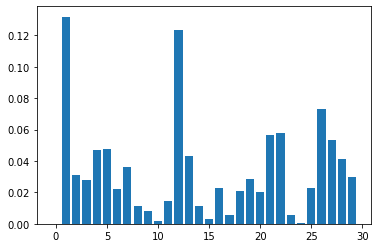

In [110]:
#Feature Importance

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [111]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.8766541822721599
Confusion Matrix : 
[[5400  385]
 [ 603 1622]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      5785
           1       0.81      0.73      0.77      2225

    accuracy                           0.88      8010
   macro avg       0.85      0.83      0.84      8010
weighted avg       0.87      0.88      0.87      8010



In [112]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.6830285530959256

In [113]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Ada Boost Classifier is : 0.8850187265917603
Confusion Matrix : 
[[5442  343]
 [ 578 1647]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5785
           1       0.83      0.74      0.78      2225

    accuracy                           0.89      8010
   macro avg       0.87      0.84      0.85      8010
weighted avg       0.88      0.89      0.88      8010



In [114]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.7038056101482937

In [115]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

[22:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Accuracy Score of XgBoost Classifier is : 0.9071161048689138
Confusion Matrix : 
[[5444  341]
 [ 403 1822]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     

In [116]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.7665027722565122

In [117]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.373979
0:	learn: 0.4533417	total: 28.3ms	remaining: 2.8s
1:	learn: 0.3878438	total: 56ms	remaining: 2.74s
2:	learn: 0.3396639	total: 82.3ms	remaining: 2.66s
3:	learn: 0.3234841	total: 110ms	remaining: 2.64s
4:	learn: 0.3055790	total: 139ms	remaining: 2.64s
5:	learn: 0.2980475	total: 164ms	remaining: 2.57s
6:	learn: 0.2913047	total: 189ms	remaining: 2.52s
7:	learn: 0.2815501	total: 220ms	remaining: 2.53s
8:	learn: 0.2751620	total: 242ms	remaining: 2.44s
9:	learn: 0.2712751	total: 274ms	remaining: 2.46s
10:	learn: 0.2677805	total: 315ms	remaining: 2.55s
11:	learn: 0.2629527	total: 350ms	remaining: 2.56s
12:	learn: 0.2602385	total: 386ms	remaining: 2.58s
13:	learn: 0.2578381	total: 429ms	remaining: 2.63s
14:	learn: 0.2563383	total: 459ms	remaining: 2.6s
15:	learn: 0.2557709	total: 482ms	remaining: 2.53s
16:	learn: 0.2540410	total: 529ms	remaining: 2.58s
17:	learn: 0.2522764	total: 582ms	remaining: 2.65s
18:	learn: 0.2505444	total: 627ms	remaining: 2.67s
19:	learn: 0

In [118]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.7588360489864275

In [119]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Cat Boost Classifier is : 0.9138576779026217
Confusion Matrix : 
[[5559  226]
 [ 464 1761]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5785
           1       0.89      0.79      0.84      2225

    accuracy                           0.91      8010
   macro avg       0.90      0.88      0.89      8010
weighted avg       0.91      0.91      0.91      8010



In [120]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.7780002144925464

In [121]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of Cat Boost Classifier is : 0.8826466916354557
Confusion Matrix : 
[[5287  498]
 [ 442 1783]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5785
           1       0.78      0.80      0.79      2225

    accuracy                           0.88      8010
   macro avg       0.85      0.86      0.85      8010
weighted avg       0.88      0.88      0.88      8010



In [122]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.7097670589042506

In [123]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

Learning rate set to 0.373979
0:	learn: 0.4533417	total: 28.5ms	remaining: 2.82s
1:	learn: 0.3878438	total: 54.2ms	remaining: 2.66s
2:	learn: 0.3396639	total: 80.4ms	remaining: 2.6s
3:	learn: 0.3234841	total: 108ms	remaining: 2.59s
4:	learn: 0.3055790	total: 137ms	remaining: 2.59s
5:	learn: 0.2980475	total: 162ms	remaining: 2.54s
6:	learn: 0.2913047	total: 189ms	remaining: 2.51s
7:	learn: 0.2815501	total: 220ms	remaining: 2.53s
8:	learn: 0.2751620	total: 248ms	remaining: 2.51s
9:	learn: 0.2712751	total: 270ms	remaining: 2.43s
10:	learn: 0.2677805	total: 294ms	remaining: 2.38s
11:	learn: 0.2629527	total: 318ms	remaining: 2.33s
12:	learn: 0.2602385	total: 346ms	remaining: 2.31s
13:	learn: 0.2578381	total: 373ms	remaining: 2.29s
14:	learn: 0.2563383	total: 417ms	remaining: 2.37s
15:	learn: 0.2557709	total: 444ms	remaining: 2.33s
16:	learn: 0.2540410	total: 470ms	remaining: 2.3s
17:	learn: 0.2522764	total: 508ms	remaining: 2.31s
18:	learn: 0.2505444	total: 542ms	remaining: 2.31s
19:	learn:

In [124]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

0.7553523399677247

In [125]:
# Models Comparison
models_city_hotel = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, version_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, # KORRIGIEREN
              accuracy_etc, accuracy_lgbm, accuracy_vc],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc]
})


models_city_hotel.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
3,Random Forest Classifier,0.917853,0.790572
8,Extra Trees Classifier,0.913858,0.778000
6,XgBoost,0.907116,0.766503
7,Cat Boost,0.904120,0.758836
10,Voting Classifier,0.905368,0.755352
9,LGBM,0.882647,0.709767
5,Gradient Boosting Classifier,0.885019,0.703806
2,Decision Tree Classifier,0.875655,0.690779
4,Ada Boost Classifier,0.876654,0.683029
1,KNN,0.850187,0.622866


In [126]:
# Models Comparison
models_resort_hotel = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, version_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, # KORRIGIEREN
              accuracy_etc, accuracy_lgbm, accuracy_vc],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc]
})


models_resort_hotel.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
3,Random Forest Classifier,0.917853,0.790572
8,Extra Trees Classifier,0.913858,0.778000
6,XgBoost,0.907116,0.766503
7,Cat Boost,0.904120,0.758836
10,Voting Classifier,0.905368,0.755352
9,LGBM,0.882647,0.709767
5,Gradient Boosting Classifier,0.885019,0.703806
2,Decision Tree Classifier,0.875655,0.690779
4,Ada Boost Classifier,0.876654,0.683029
1,KNN,0.850187,0.622866
